# Project: AI Agriculture Technology: Optimizing Crop Yield Prediction

## Overview

This project aims to build machine learning models for predicting crop yield using historical agricultural data. The focus will be on developing, training, and evaluating machine learning algorithms to accurately forecast crop yields based on factors such as weather patterns, soil data, crop type, and other relevant agricultural inputs. The project will implement supervised learning models to improve decision making for farmers, enhancing productivity and profitability.

## Problem Statement

Farmers often rely on traditional methods to predict crop yields, which may not always be accurate due to the complexity of factors such as weather variations, soil conditions, and crop health. This unpredictability leads to inefficiencies in resource management and planning. A data driven, machine learning based approach can help solve this problem by providing more accurate yield predictions, allowing farmers to make informed decisions about planting, fertilization, and harvesting.
The proposed solution involves developing a machine learning model that can accurately predict crop yields based on historical agricultural data


## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Load Dataset

In [2]:
df = pd.read_csv("D:/crop_yield.csv/crop_yield.csv")
df.head(5)

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

## Data Preprocessing Techniques

In [3]:
#checking Null Values
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [4]:
#checking duplicated values
df.duplicated().sum()

0

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [5]:
df['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [6]:
df['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [7]:
df['State'].unique()

array(['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

## Statistic Summary

In [357]:
df.describe()

Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+07  2.004170e+04      2.388889  
max    4.835407e+09  1.575051e+07  21105.000000

## Outliers Detection

### Attribute: Area

<Axes: xlabel='Area'>

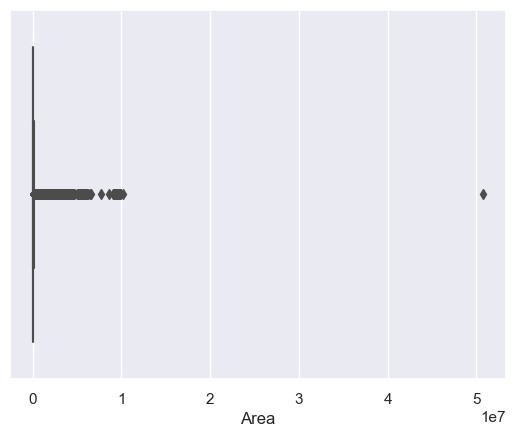

In [358]:
#checking outliers
sns.boxplot(x=df['Area'])

### Attribute: Production

<Axes: xlabel='Production'>

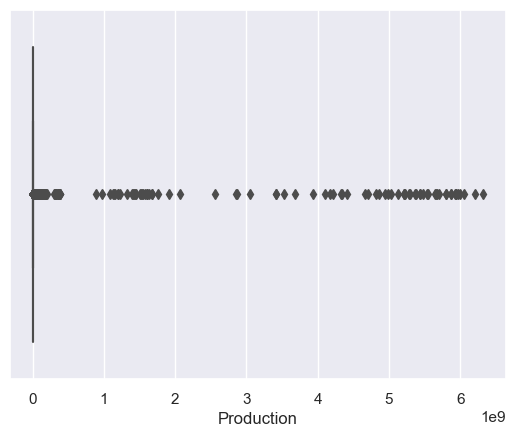

In [359]:
sns.boxplot(x=df['Production'])

### Attribute: Annual Rainfall

<Axes: xlabel='Annual_Rainfall'>

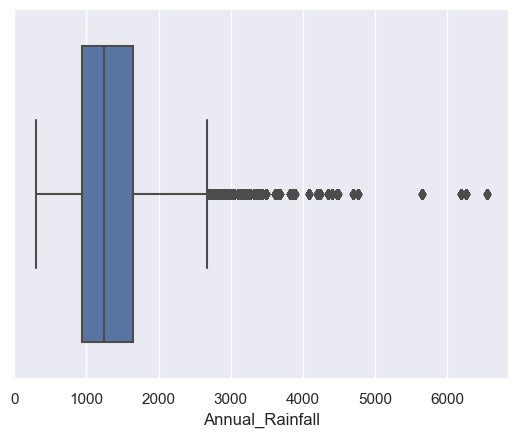

In [360]:
sns.boxplot(x=df['Annual_Rainfall'])

### Attribute: Fertilizer

<Axes: xlabel='Fertilizer'>

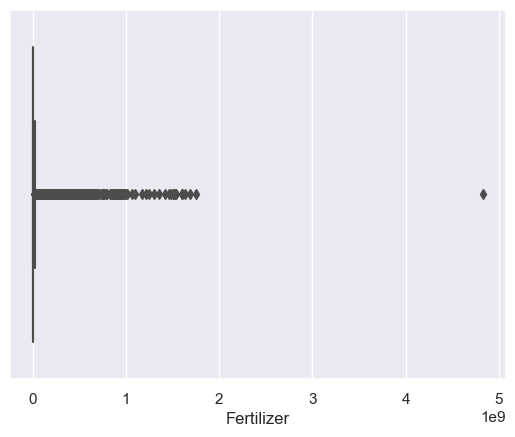

In [361]:
sns.boxplot(x=df['Fertilizer'])

### Attribute: Pesticide

<Axes: xlabel='Pesticide'>

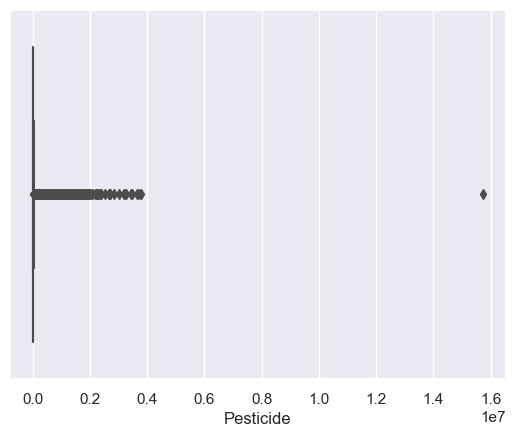

In [362]:
sns.boxplot(x=df['Pesticide'])

### Attribute: Yield

<Axes: xlabel='Yield'>

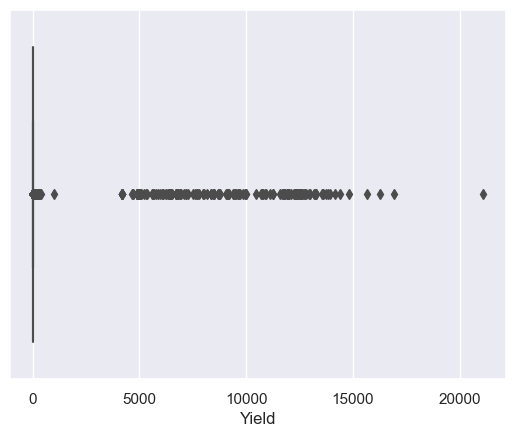

In [363]:
sns.boxplot(x=df['Yield'])

## Removing Outliers

In [364]:
df_numeric = df.select_dtypes(include=['number'])
Q1= df_numeric.quantile(0.25)
Q3= df_numeric.quantile(0.75)
IQR = Q3-Q1

In [365]:
print(IQR)

Crop_Year          1.100000e+01
Area               7.372200e+04
Production         1.213250e+05
Annual_Rainfall    7.030000e+02
Fertilizer         9.815833e+06
Pesticide          1.968500e+04
Yield              1.788889e+00
dtype: float64


In [366]:
df_numeric.head(2)

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
1       1997   6637.0        4685           2051.4   631643.29    2057.47   

      Yield  
0  0.796087  
1  0.710435

In [367]:
df_new = df_numeric

In [368]:
df_new = df_new[~((df_new<(Q1-1.5*IQR)) | (df_new>(Q3+1.5*IQR))).any(axis=1)]

In [369]:
df_new.shape

(12339, 7)

## Visualization after Removing Outliers

### Attribute: Area

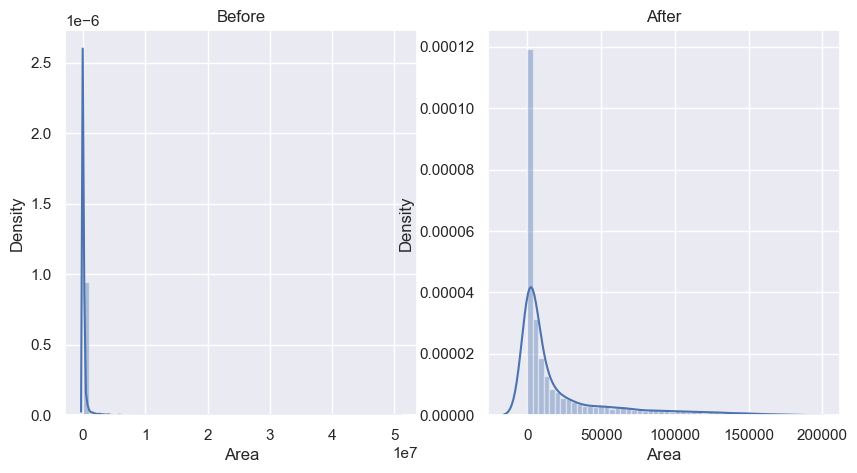

In [370]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Area"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df_new["Area"])
plt.show()

### Attribute: Production

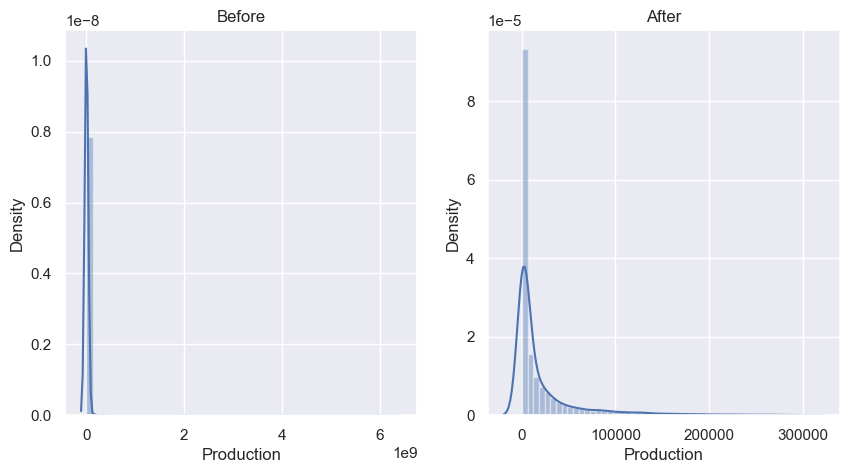

In [371]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Production"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df_new["Production"])
plt.show()

### Attribute: Annual Rainfall

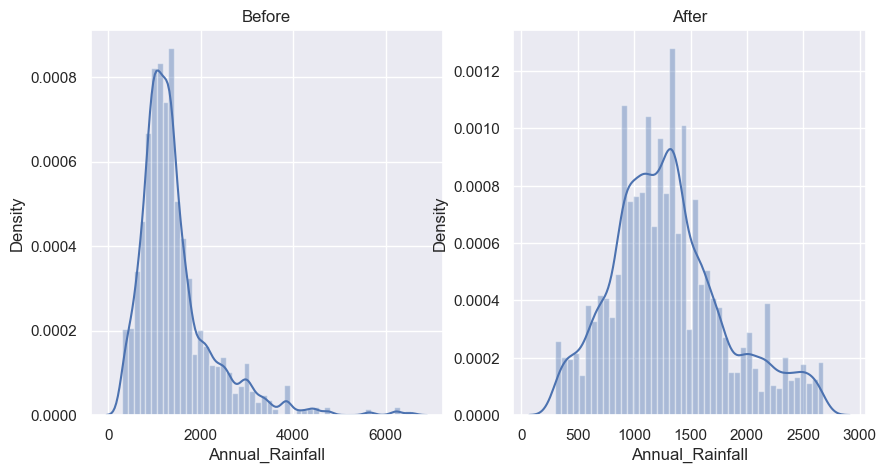

In [372]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Annual_Rainfall"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df_new["Annual_Rainfall"])
plt.show()

### Attribute: Fertilizer

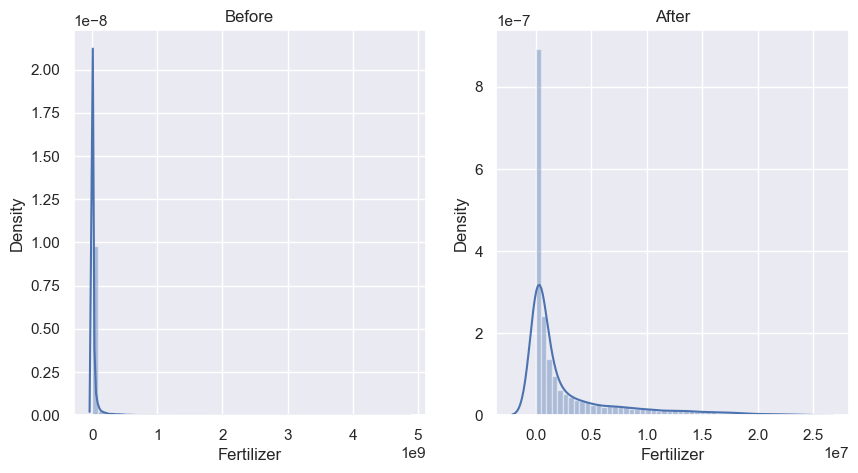

In [373]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Fertilizer"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df_new["Fertilizer"])
plt.show()

### Attribute: Pesticide

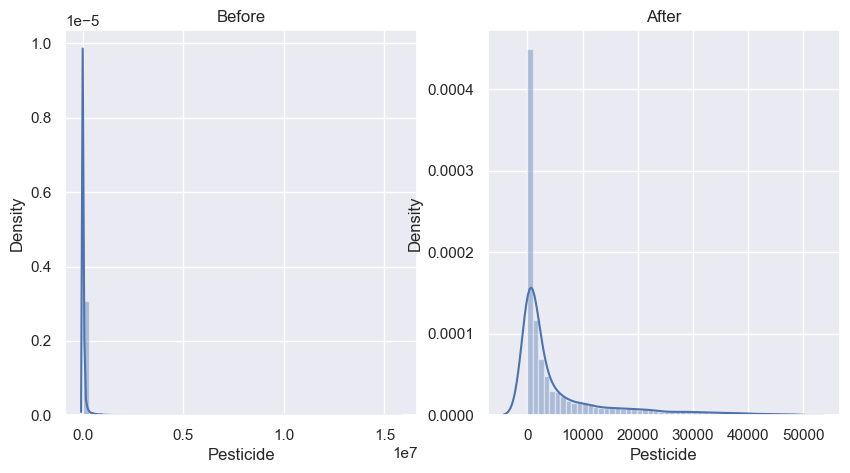

In [374]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Pesticide"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df_new["Pesticide"])
plt.show()

### Attribute: Yield

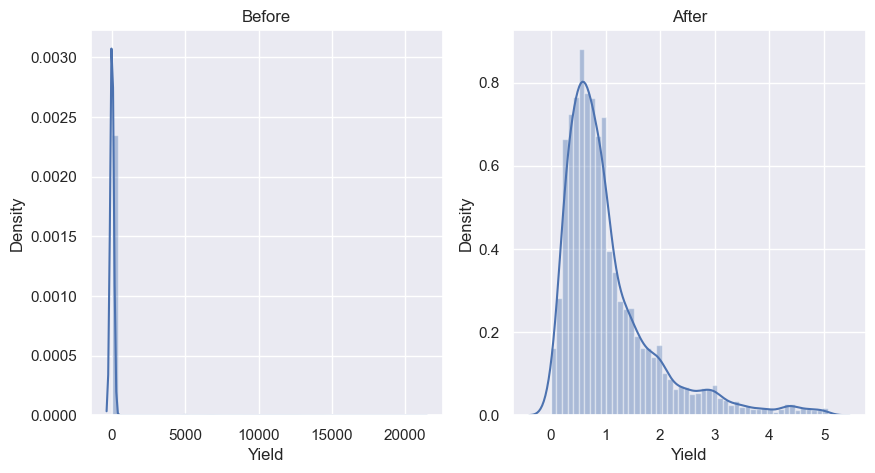

In [375]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(df["Yield"])
plt.subplot(1,2,2)
plt.title("After")
sns.distplot(df_new["Yield"])
plt.show()

In [376]:
df_new['Crop']=df['Crop']

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\2271848879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Crop']=df['Crop']


In [377]:
df_new['Crop_Year']=df['Crop_Year']

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\4142042928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Crop_Year']=df['Crop_Year']


In [378]:
df_new['Season']=df['Season']

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\2173038109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Season']=df['Season']


In [379]:
df_new['State']=df['State']

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\3074357205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['State']=df['State']


In [380]:
df_new.head(2)

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997  73814.0       56708           2051.4  7024878.38   22882.34   
1       1997   6637.0        4685           2051.4   631643.29    2057.47   

      Yield       Crop       Season  State  
0  0.796087   Arecanut  Whole Year   Assam  
1  0.710435  Arhar/Tur  Kharif       Assam

In [381]:
df_new['Season'] = df_new['Season'].str.strip()

C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\994855912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Season'] = df_new['Season'].str.strip()


In [382]:
df_new = df_new.sort_values(by='Yield', ascending=True)

In [383]:
df_new.head()

Crop_Year   Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
14219       2015   58.0           0      1136.000000     9158.78      19.14   
12130       2011  652.0           0       471.540909   109223.04     215.16   
4175        2014   49.0           0       687.600000     7397.04      16.17   
16714       2019   55.0           0      1420.300000     9446.80      20.35   
12136       2011  541.0           0       471.540909    90628.32     178.53   

       Yield                 Crop      Season           State  
14219    0.0             Coconut   Whole Year    Chhattisgarh  
12130    0.0                 Jute      Kharif         Haryana  
4175     0.0              Tapioca        Rabi  Andhra Pradesh  
16714    0.0             Coconut   Whole Year    Chhattisgarh  
12136    0.0  Other Kharif pulses      Kharif         Haryana

In [384]:
# Create a mapping dictionary for encoding
crop_mapping = {label: idx for idx, label in enumerate(df_new['Crop'].unique())}

# # Save the mapping to a file (e.g., using pickle)
# with open('crop_item_mapping.pkl', 'wb') as f:
#     pickle.dump(crop_mapping, f)

# Apply the mapping to the column using map()
df_new['Crop_encoded'] = df_new['Crop'].map(crop_mapping)

In [385]:
df_new.head(1)

Crop_Year  Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
14219       2015  58.0           0           1136.0     9158.78      19.14   

       Yield      Crop      Season         State  Crop_encoded  
14219    0.0  Coconut   Whole Year  Chhattisgarh             0

In [387]:
df_new['Crop_encoded']

14219     0
12130     1
4175      2
16714     0
12136     3
         ..
9531     19
12410     8
11857     8
2345     19
16735    15
Name: Crop_encoded, Length: 12339, dtype: int64

In [388]:
Season_mapping = {label: idx for idx, label in enumerate(df_new['Season'].unique())}

In [389]:
df_new['Season_encoded'] = df_new['Season'].map(Season_mapping)

In [390]:
state_mapping = {label: idx for idx, label in enumerate(df_new['State'].unique())}

In [391]:
df_new['State_encoded'] = df_new['State'].map(state_mapping)

In [392]:
df_new.head()

Crop_Year   Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
14219       2015   58.0           0      1136.000000     9158.78      19.14   
12130       2011  652.0           0       471.540909   109223.04     215.16   
4175        2014   49.0           0       687.600000     7397.04      16.17   
16714       2019   55.0           0      1420.300000     9446.80      20.35   
12136       2011  541.0           0       471.540909    90628.32     178.53   

       Yield                 Crop      Season           State  Crop_encoded  \
14219    0.0             Coconut   Whole Year    Chhattisgarh             0   
12130    0.0                 Jute      Kharif         Haryana             1   
4175     0.0              Tapioca        Rabi  Andhra Pradesh             2   
16714    0.0             Coconut   Whole Year    Chhattisgarh             0   
12136    0.0  Other Kharif pulses      Kharif         Haryana             3   

       Season_encoded  State_encoded  
14219               0              0  
12130               1              1  
4175                2              2  
16714               0              0  
12136               1              1

In [393]:
import pickle

In [394]:
# Save the mapping to a file (e.g., using pickle)
with open('crop_item_mapping.pkl', 'wb') as f:
    pickle.dump(crop_mapping, f)
with open('season_mapping.pkl', 'wb') as f:
    pickle.dump(Season_mapping, f)
with open('State_mapping.pkl', 'wb') as f:
    pickle.dump(state_mapping, f)

In [395]:
df_new['Crop_encoded'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54], dtype=int64)

In [396]:
df_new['Season_encoded'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [397]:
df_new['State_encoded'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [398]:
df_new['State'].unique()

array(['Chhattisgarh', 'Haryana', 'Andhra Pradesh', 'Madhya Pradesh',
       'Kerala', 'Tamil Nadu', 'Telangana', 'Karnataka', 'Uttarakhand',
       'Puducherry', 'West Bengal', 'Himachal Pradesh', 'Maharashtra',
       'Gujarat', 'Nagaland', 'Uttar Pradesh', 'Odisha', 'Mizoram',
       'Jammu and Kashmir', 'Delhi', 'Goa', 'Assam', 'Tripura', 'Punjab',
       'Manipur', 'Jharkhand', 'Bihar', 'Sikkim', 'Meghalaya',
       'Arunachal Pradesh'], dtype=object)

In [399]:
df_new['Season'].unique()

array(['Whole Year', 'Kharif', 'Rabi', 'Summer', 'Winter', 'Autumn'],
      dtype=object)

# Feature Extraction

In [400]:
X=df_new[['Crop_encoded','Crop_Year','Season_encoded','State_encoded','Area','Production','Annual_Rainfall','Fertilizer','Pesticide']]
y=df_new['Yield']

In [401]:
X.head(3)

Crop_encoded  Crop_Year  Season_encoded  State_encoded   Area  \
14219             0       2015               0              0   58.0   
12130             1       2011               1              1  652.0   
4175              2       2014               2              2   49.0   

       Production  Annual_Rainfall  Fertilizer  Pesticide  
14219           0      1136.000000     9158.78      19.14  
12130           0       471.540909   109223.04     215.16  
4175            0       687.600000     7397.04      16.17

In [402]:
y

14219    0.000000
12130    0.000000
4175     0.000000
16714    0.000000
12136    0.000000
           ...   
9531     5.051250
12410    5.060625
11857    5.069000
2345     5.070000
16735    5.070800
Name: Yield, Length: 12339, dtype: float64

## Data Checking Linear or Non-Linear

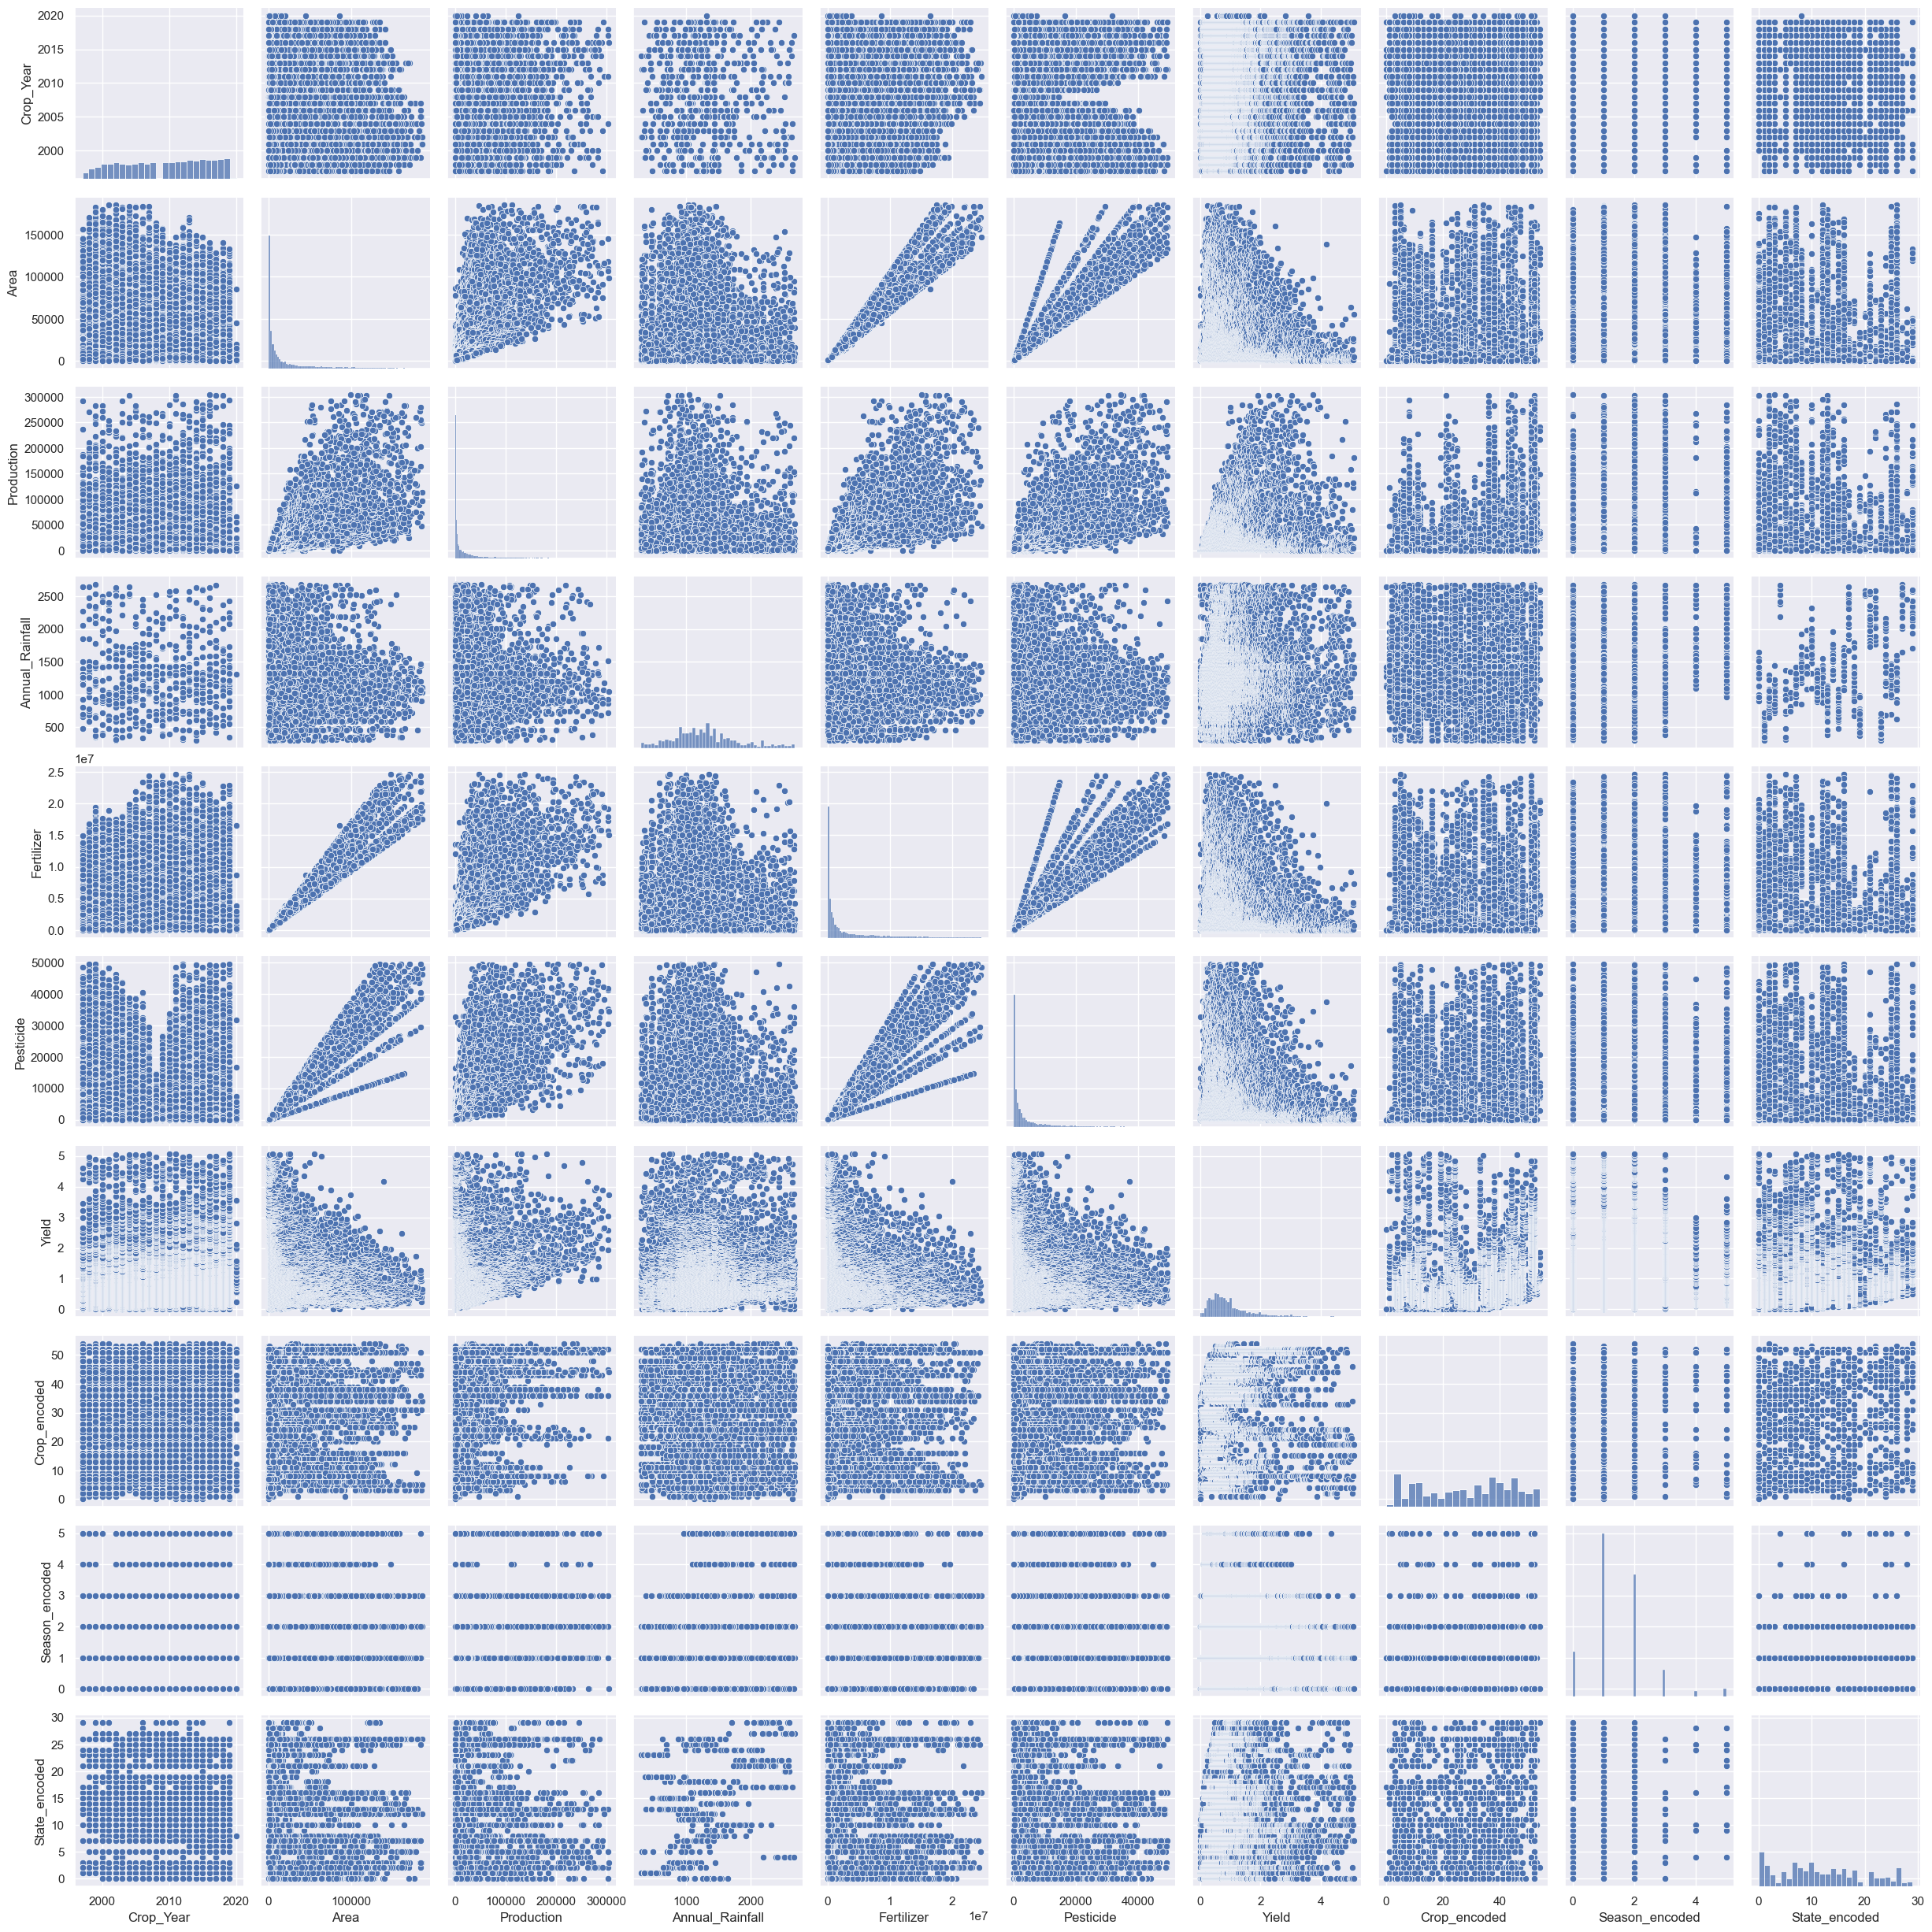

In [403]:
sns.pairplot(data=df_new)
plt.show()

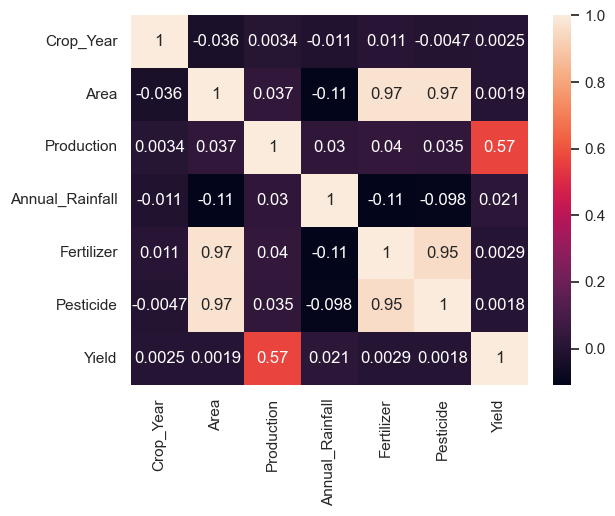

In [404]:
sns.heatmap(data=df_numeric.corr(),annot=True)
plt.show()

In [405]:
X['Crop_encoded'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54], dtype=int64)

In [406]:
import pickle

In [407]:
X.head(1)

Crop_encoded  Crop_Year  Season_encoded  State_encoded  Area  \
14219             0       2015               0              0  58.0   

       Production  Annual_Rainfall  Fertilizer  Pesticide  
14219           0           1136.0     9158.78      19.14

In [408]:
# Rename specific columns
X.rename(columns={'Crop_encoded': 'Crop', 'Crop_Year': 'Crop_Year','Season_encoded':'Season','State_encoded':'State','area':'Area','production':'Production','Annual_Rainfall':'Annual_Rainfal','Fertilizer':'Fertilizer','Pesticide':'Pesticide'}, inplace=True)


C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\4147951889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={'Crop_encoded': 'Crop', 'Crop_Year': 'Crop_Year','Season_encoded':'Season','State_encoded':'State','area':'Area','production':'Production','Annual_Rainfall':'Annual_Rainfal','Fertilizer':'Fertilizer','Pesticide':'Pesticide'}, inplace=True)


In [409]:
X.head()

Crop  Crop_Year  Season  State   Area  Production  Annual_Rainfal  \
14219     0       2015       0      0   58.0           0     1136.000000   
12130     1       2011       1      1  652.0           0      471.540909   
4175      2       2014       2      2   49.0           0      687.600000   
16714     0       2019       0      0   55.0           0     1420.300000   
12136     3       2011       1      1  541.0           0      471.540909   

       Fertilizer  Pesticide  
14219     9158.78      19.14  
12130   109223.04     215.16  
4175      7397.04      16.17  
16714     9446.80      20.35  
12136    90628.32     178.53

In [410]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12339 entries, 14219 to 16735
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            12339 non-null  int64  
 1   Crop_Year       12339 non-null  int64  
 2   Season          12339 non-null  int64  
 3   State           12339 non-null  int64  
 4   Area            12339 non-null  float64
 5   Production      12339 non-null  int64  
 6   Annual_Rainfal  12339 non-null  float64
 7   Fertilizer      12339 non-null  float64
 8   Pesticide       12339 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 964.0 KB


In [310]:
for column in X.select_dtypes(include='int64').columns:
    X[column].astype('float64')

In [411]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12339 entries, 14219 to 16735
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            12339 non-null  int64  
 1   Crop_Year       12339 non-null  int64  
 2   Season          12339 non-null  int64  
 3   State           12339 non-null  int64  
 4   Area            12339 non-null  float64
 5   Production      12339 non-null  int64  
 6   Annual_Rainfal  12339 non-null  float64
 7   Fertilizer      12339 non-null  float64
 8   Pesticide       12339 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 964.0 KB


## Feature Scalling

In [412]:
from sklearn.preprocessing import StandardScaler

In [413]:
ss = StandardScaler()

In [94]:
for column in X.select_dtypes(include='object').columns:
    X[column].astype('float64')

In [414]:
for column in X.columns:
    X[column]=ss.fit_transform(X[[column]])


C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\97192522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]=ss.fit_transform(X[[column]])
C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\97192522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column]=ss.fit_transform(X[[column]])
C:\Users\Ehtisham\AppData\Local\Temp\ipykernel_15020\97192522.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [415]:
with open('scaler_encoder.pkl', 'wb') as file:
    pickle.dump(ss, file)

In [416]:
X.head(10)

Crop  Crop_Year    Season     State      Area  Production  \
14219 -1.822344   0.904257 -1.496176 -1.534811 -0.617188   -0.517395   
12130 -1.757613   0.280952 -0.487912 -1.407916 -0.600211   -0.517395   
4175  -1.692881   0.748431  0.520352 -1.281022 -0.617445   -0.517395   
16714 -1.822344   1.527562 -1.496176 -1.534811 -0.617273   -0.517395   
12136 -1.628150   0.280952 -0.487912 -1.407916 -0.603384   -0.517395   
16725 -1.757613   1.527562 -0.487912 -1.534811 -0.617845   -0.517395   
12141 -1.563419   0.280952 -0.487912 -1.407916 -0.616987   -0.517395   
16733 -1.498688   1.527562  1.528616 -1.534811 -0.614472   -0.517395   
12143 -1.433956   0.280952 -0.487912 -1.407916 -0.618759   -0.517395   
12146 -1.369225   0.280952 -1.496176 -1.407916 -0.617788   -0.517395   

       Annual_Rainfal  Fertilizer  Pesticide  
14219       -0.332573   -0.623592  -0.608929  
12130       -1.642036   -0.601739  -0.588102  
4175        -1.216244   -0.623977  -0.609245  
16714        0.227703   -0.623529  -0.608801  
12136       -1.642036   -0.605800  -0.591994  
16725        0.227703   -0.624280  -0.609587  
12141       -1.642036   -0.623215  -0.608684  
16733        0.227703   -0.619853  -0.604948  
12143       -1.642036   -0.625483  -0.610858  
12146       -1.642036   -0.624239  -0.609666

In [417]:
y=ss.fit_transform(df_new[['Yield']])

In [418]:
y

array([[-1.2146738 ],
       [-1.2146738 ],
       [-1.2146738 ],
       ...,
       [ 4.63410441],
       [ 4.63525825],
       [ 4.63618131]])

In [419]:
y=pd.DataFrame(y,columns=["Yield"])

In [420]:
y.head(100)

Yield
0  -1.214674
1  -1.214674
2  -1.214674
3  -1.214674
4  -1.214674
..       ...
95 -1.214674
96 -1.214674
97 -1.210553
98 -1.194312
99 -1.181707

[100 rows x 1 columns]

In [421]:
y.tail(100)

Yield
12239  4.012189
12240  4.019881
12241  4.024154
12242  4.029977
12243  4.049688
...         ...
12334  4.613624
12335  4.624441
12336  4.634104
12337  4.635258
12338  4.636181

[100 rows x 1 columns]

## Data Split Training & Testing

In [422]:
from sklearn.model_selection import train_test_split

In [423]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.1,shuffle=True, random_state=42)

In [424]:
X_train.shape

(11105, 9)

In [425]:
X_test.shape

(1234, 9)

In [426]:
y_train.shape

(11105, 1)

In [427]:
y_test.shape

(1234, 1)

## Model Selections

In [428]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

## Model Training 

### RandomForest Regressor

In [429]:
rf = RandomForestRegressor(n_estimators=200,random_state=42,criterion='squared_error')

In [430]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [431]:
train_score = rf.score(X_train, y_train)  
test_score = rf.score(X_test, y_test)      

train_score, test_score

(0.990910323514916, 0.9386789305343888)

### Loss Graph

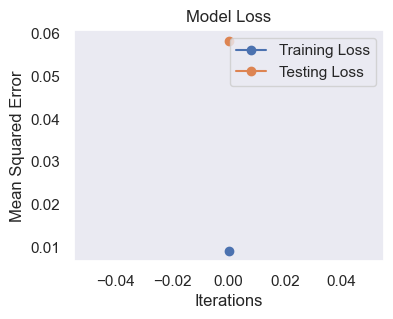

In [432]:
train_losses = []
test_losses = []
n_iterations = 1

# Perform the training and record losses
for _ in range(n_iterations):
    rf.fit(X_train, y_train)  # Fit the model
    train_pred = rf.predict(X_train)    # Predictions on training data
    test_pred = rf.predict(X_test)      # Predictions on testing data
    
    # Calculate MSE for train and test
    train_loss = mean_squared_error(y_train, train_pred)
    test_loss = mean_squared_error(y_test, test_pred)
    
    # Append losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting the loss graph
plt.figure(figsize=(4, 3))
plt.plot(range(n_iterations), train_losses, label='Training Loss', marker='o')
plt.plot(range(n_iterations), test_losses, label='Testing Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()


### RandomForest Prediction

In [433]:
rf.predict([[-1.284685,0.904257,1.932780,-1.159615,-0.617188,-0.517395,-0.332573,-0.623592,-0.608929]])

array([-1.2146738])

## Hyperparameter Tunning RandomForest

### Optuna 

In [434]:
import optuna

In [435]:
from sklearn.model_selection import cross_val_score

In [436]:
def objective(trial):
    # Suggesting the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 400)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Define RandomForestRegressor with the suggested hyperparameters
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
    )
    
    # Perform cross-validation to evaluate the performance
    score = cross_val_score(rf, X_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error').mean()
    
    # We return the negative MSE as higher is better for Optuna
    return score

In [437]:
study = optuna.create_study(direction='maximize')


[I 2024-11-16 19:39:29,928] A new study created in memory with name: no-name-b5cbfe3d-6130-4037-b7d0-9681707e9a4d


In [438]:
# study.optimize(objective, n_trials=100)

In [439]:
# study.best_params

### Best Parameter Tune RandomForest

In [440]:
rf = RandomForestRegressor(n_estimators= 199, max_depth= 19, min_samples_split= 2, min_samples_leaf=4,random_state=50)

In [441]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, min_samples_leaf=4, n_estimators=199,
                      random_state=50)

In [442]:
train_score = rf.score(X_train, y_train)  
test_score = rf.score(X_test, y_test)      

train_score, test_score

(0.9687273573161739, 0.9369746578686846)

In [443]:
dd=rf.predict([[-1.284685,0.904257,1.932780,-1.159615,-0.617188,-0.517395,-0.332573,-0.623592,-0.608929]])

In [79]:
dd

array([-1.21432591])

In [81]:
# Reshape using array.reshape(-1, 1) if it’s a single feature
d = ss.inverse_transform(np.array(dd[0]).reshape(-1, 1))


In [82]:
d

array([[0.00030151]])

In [345]:
import pickle

In [444]:
filename = 'crop_yield_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [167]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9369746578686846


### DecisionTreeRegressor Model Traning & Testing

In [75]:
dt = DecisionTreeRegressor()

In [76]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [77]:
train_score = dt.score(X_train, y_train)  
test_score = dt.score(X_test, y_test)      

train_score, test_score

(1.0, 0.8739219669435483)

### DecisionTreeRegressor Prediction

In [78]:
dt.predict([[-1.284685,0.904257,1.932780,-1.159615,-0.617188,-0.517395,-0.332573,-0.623592,-0.608929]])

C:\Users\Ehtisham\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([-1.2146738])

### GradientBoostingRegressor Model

In [79]:
gb = GradientBoostingRegressor(n_estimators=100, warm_start=True)

In [80]:
gb.fit(X_train, y_train)

C:\Users\Ehtisham\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(warm_start=True)

In [81]:
train_score = gb.score(X_train, y_train)  
test_score = gb.score(X_test, y_test)      

train_score, test_score

(0.8893154521951104, 0.8763578458183372)

### GradientBoostingRegressor Prediction

In [82]:
gb.predict([[-1.284685,0.904257,1.932780,-1.159615,-0.617188,-0.517395,-0.332573,-0.623592,-0.608929]])

C:\Users\Ehtisham\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([-1.16064559])

### HyperParameter Tunning AdaBoost

In [83]:
base_regressor = DecisionTreeRegressor(max_depth=3)

# Create the AdaBoost regressor with the base regressor
ada = AdaBoostRegressor(estimator=base_regressor, n_estimators=100, random_state=42)

In [84]:
ada.fit(X_train , y_train)

C:\Users\Ehtisham\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=100, random_state=42)

In [85]:
train_score = ada.score(X_train, y_train)  
test_score = ada.score(X_test, y_test)      

train_score, test_score

(0.36472618649393085, 0.35939555195082096)

### AdaBoostRegressor Prediction

In [86]:
ada.predict([[-1.284685,0.904257,1.932780,-1.159615,-0.617188,-0.517395,-0.332573,-0.623592,-0.608929]])

C:\Users\Ehtisham\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([0.58861819])

### KNeighborsRegressor Model

In [87]:
kn = KNeighborsRegressor(n_neighbors=5,
    weights='uniform')

In [88]:
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
train_score = kn.score(X_train, y_train)  
test_score = kn.score(X_test, y_test)      

train_score, test_score

(0.696066451761866, 0.5839740458486684)

### LinearRegression Model

In [90]:
lr = LinearRegression(n_jobs=-1)

In [91]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [92]:
train_score = lr.score(X_train, y_train)*100  
test_score = lr.score(X_test, y_test)*100      

train_score, test_score

(28.625308322134813, 30.3931721124305)

## Try to Avoid Overfitting DecissionTree Model

In [93]:
dt= DecisionTreeRegressor(max_depth=10,min_samples_split=5)

In [94]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5)

In [95]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [96]:
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

In [97]:
print(f"Training Loss (MSE): {train_loss:.4f}")
print(f"Testing Loss (MSE): {test_loss:.4f}")

Training Loss (MSE): 0.1459
Testing Loss (MSE): 0.2055


## Loss Graph

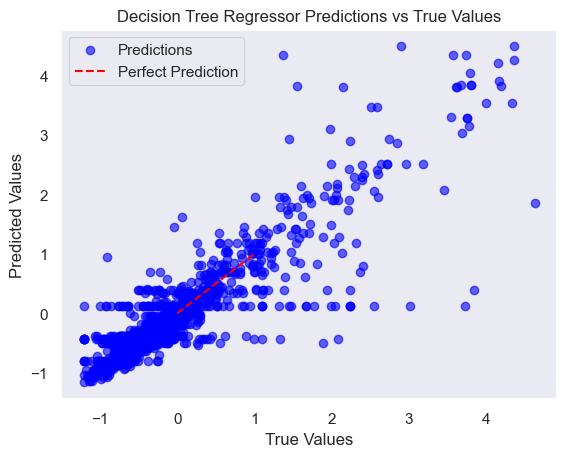

In [98]:
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor Predictions vs True Values')
plt.legend()
plt.grid()
plt.show()

In [99]:
train_score = dt.score(X_train, y_train)*100  
test_score = dt.score(X_test, y_test)*100      

train_score, test_score

(85.49174765040226, 78.38302392534696)

# Implement Advance Model

## Artificial Neural Network

In [100]:
import tensorflow

In [101]:
from keras.layers import Dense, BatchNormalization,Dropout, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import L2

In [102]:
ann = Sequential()

### Creating Hidden Layers

In [103]:
ann.add(Dense(6,input_dim=9,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(6,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(3,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dense(2,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dropout(0.1))
ann.add(Dense(1,activation="linear"))

In [104]:
ann.compile(optimizer='adam',loss='huber',metrics=['mse'])

### Model Training

In [105]:
ann.fit(X_train,y_train,batch_size=100,epochs=40,validation_data=(X_test,y_test),callbacks=EarlyStopping())

Epoch 1/40


112/112 [==============================] - 2s 6ms/step - loss: 0.5053 - mse: 1.0147 - val_loss: 0.4514 - val_mse: 0.9684
Epoch 2/40
112/112 [==============================] - 0s 3ms/step - loss: 0.4432 - mse: 1.0269 - val_loss: 0.4055 - val_mse: 0.9630
Epoch 3/40
112/112 [==============================] - 0s 3ms/step - loss: 0.4058 - mse: 1.0203 - val_loss: 0.3756 - val_mse: 0.9493
Epoch 4/40
112/112 [==============================] - 0s 3ms/step - loss: 0.3797 - mse: 0.9984 - val_loss: 0.3508 - val_mse: 0.9227
Epoch 5/40
112/112 [==============================] - 0s 3ms/step - loss: 0.3571 - mse: 0.9630 - val_loss: 0.3298 - val_mse: 0.8725
Epoch 6/40
112/112 [==============================] - 0s 3ms/step - loss: 0.3414 - mse: 0.9215 - val_loss: 0.3171 - val_mse: 0.8343
Epoch 7/40
112/112 [==============================] - 0s 3ms/step - loss: 0.3305 - mse: 0.8897 - val_loss: 0.3088 - val_mse: 0.8043
Epoch 8/40
112/112 [==============================] - 0s 4ms/step - loss: 

In [106]:
train_accuracy=ann.history.history["mse"]

In [108]:
test_accuracy=ann.history.history["val_mse"]

### Loss Graph

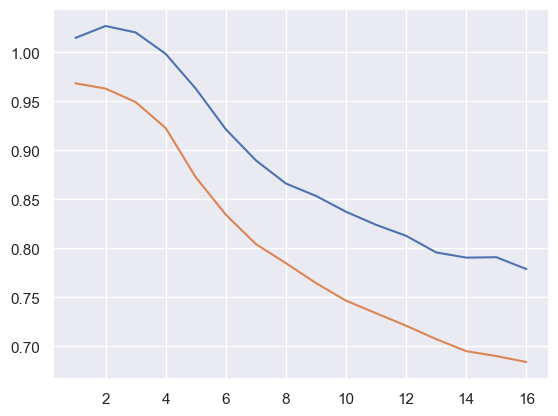

In [110]:
plt.plot([i for i in range(1,len(train_accuracy)+1)],train_accuracy)
plt.plot([i for i in range(1,len(train_accuracy)+1)],test_accuracy)
plt.show()

### ANN Model Accuracy

In [111]:
r2_score(y_train,ann.predict(X_train))*100  , r2_score(y_test,ann.predict(X_test))*100

39/39 [==============================] - 0s 3ms/step


(27.22388505935669, 28.077596426010132)

### Try to increase Hidden Layer

In [112]:
ann.add(Dense(8,input_dim=9,activation="relu"))
ann.add(Dense(7,activation="relu"))
ann.add(Dense(7,activation="relu"))
ann.add(Dense(3,activation="relu"))
ann.add(Dense(3,activation="relu"))
ann.add(Dense(2,activation="relu",kernel_regularizer=L2(l2=0.01)))
ann.add(Dropout(0.5))
ann.add(Dense(1,activation="linear"))

In [113]:
ann.compile(optimizer='adam',loss='huber',metrics=['mse'])

In [114]:
ann.fit(X_train,y_train,batch_size=100,epochs=40,validation_data=(X_test,y_test),callbacks=EarlyStopping())

Epoch 1/40
112/112 [==============================] - 4s 7ms/step - loss: 0.3936 - mse: 0.9823 - val_loss: 0.3560 - val_mse: 0.8840
Epoch 2/40
112/112 [==============================] - 1s 5ms/step - loss: 0.3668 - mse: 0.9428 - val_loss: 0.3330 - val_mse: 0.8438
Epoch 3/40
112/112 [==============================] - 1s 5ms/step - loss: 0.3543 - mse: 0.9301 - val_loss: 0.3148 - val_mse: 0.8123
Epoch 4/40
112/112 [==============================] - 1s 5ms/step - loss: 0.3488 - mse: 0.9359 - val_loss: 0.3097 - val_mse: 0.8125
Epoch 5/40
112/112 [==============================] - 0s 4ms/step - loss: 0.3456 - mse: 0.9288 - val_loss: 0.3037 - val_mse: 0.7904
Epoch 6/40
112/112 [==============================] - 1s 4ms/step - loss: 0.3451 - mse: 0.9356 - val_loss: 0.3038 - val_mse: 0.8103


In [115]:
r2_score(y_train,ann.predict(X_train))*100  ,  r2_score(y_test,ann.predict(X_test))*100

39/39 [==============================] - 0s 3ms/step


(13.803023099899292, 14.785248041152954)

## Long Short-Term Memory

In [116]:
# Convert X_train from a DataFrame to a NumPy array and reshape
X_train = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])


In [117]:
# Assuming X_train and y_train are your prepared datasets
timesteps = X_train.shape[1]  # Number of features in each time step
num_features = X_train.shape[2]  # Number of features in each sample

## Define RNN Model

In [118]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, num_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Linear activation for regression output

In [119]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [120]:
# Train the model
history = model.fit(X_train, y_train, epochs=130, batch_size=64, validation_split=0.2)

Epoch 1/130
139/139 [==============================] - 8s 16ms/step - loss: 0.8454 - mae: 0.6437 - val_loss: 0.7498 - val_mae: 0.5957
Epoch 2/130
139/139 [==============================] - 1s 8ms/step - loss: 0.6156 - mae: 0.5204 - val_loss: 0.5656 - val_mae: 0.4757
Epoch 3/130
139/139 [==============================] - 1s 8ms/step - loss: 0.5031 - mae: 0.4553 - val_loss: 0.4657 - val_mae: 0.4068
Epoch 4/130
139/139 [==============================] - 1s 7ms/step - loss: 0.4461 - mae: 0.4218 - val_loss: 0.4206 - val_mae: 0.3757
Epoch 5/130
139/139 [==============================] - 1s 7ms/step - loss: 0.4197 - mae: 0.4020 - val_loss: 0.3951 - val_mae: 0.3605
Epoch 6/130
139/139 [==============================] - 1s 7ms/step - loss: 0.4009 - mae: 0.3927 - val_loss: 0.3820 - val_mae: 0.3564
Epoch 7/130
139/139 [==============================] - 1s 7ms/step - loss: 0.3838 - mae: 0.3809 - val_loss: 0.3711 - val_mae: 0.3375
Epoch 8/130
139/139 [==============================] - 1s 7ms/step -

139/139 [==============================] - 1s 7ms/step - loss: 0.2203 - mae: 0.2700 - val_loss: 0.2386 - val_mae: 0.2357
Epoch 124/130
139/139 [==============================] - 1s 7ms/step - loss: 0.2123 - mae: 0.2671 - val_loss: 0.1920 - val_mae: 0.2387
Epoch 125/130
139/139 [==============================] - 1s 7ms/step - loss: 0.2174 - mae: 0.2696 - val_loss: 0.1998 - val_mae: 0.2224
Epoch 126/130
139/139 [==============================] - 1s 7ms/step - loss: 0.2086 - mae: 0.2635 - val_loss: 0.1827 - val_mae: 0.2229
Epoch 127/130
139/139 [==============================] - 1s 7ms/step - loss: 0.2099 - mae: 0.2660 - val_loss: 0.2047 - val_mae: 0.2201
Epoch 128/130
139/139 [==============================] - 1s 7ms/step - loss: 0.2090 - mae: 0.2658 - val_loss: 0.2125 - val_mae: 0.2405
Epoch 129/130
139/139 [==============================] - 1s 7ms/step - loss: 0.2140 - mae: 0.2679 - val_loss: 0.1822 - val_mae: 0.2238
Epoch 130/130
139/139 [==============================] - 1s 7ms/step 

In [121]:
# Convert X_test to a NumPy array and reshape it to (samples, 1, features)
X_test = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])


In [122]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

39/39 [==============================] - 0s 4ms/step - loss: 0.1846 - mae: 0.2434
Test Mean Absolute Error: 0.24338702857494354


### Loss Graph

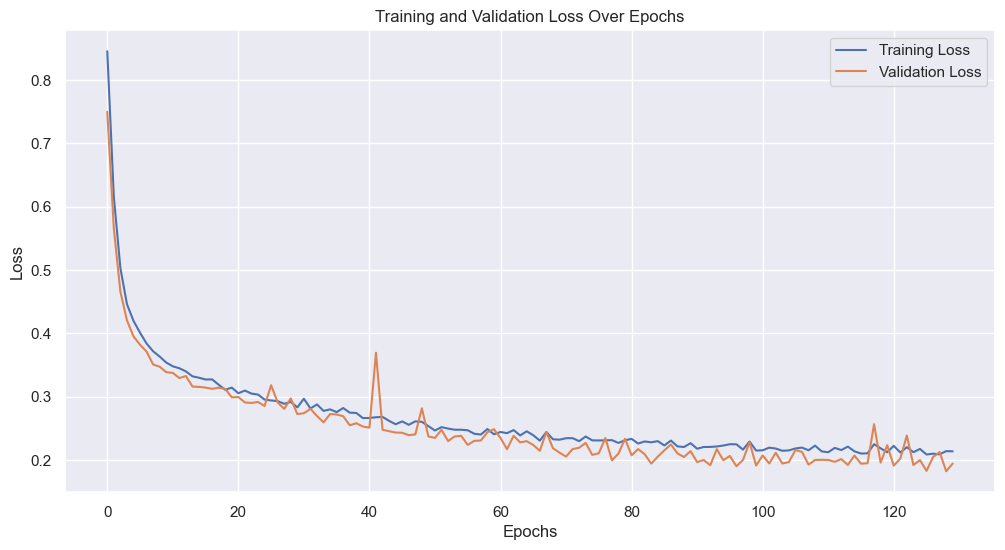

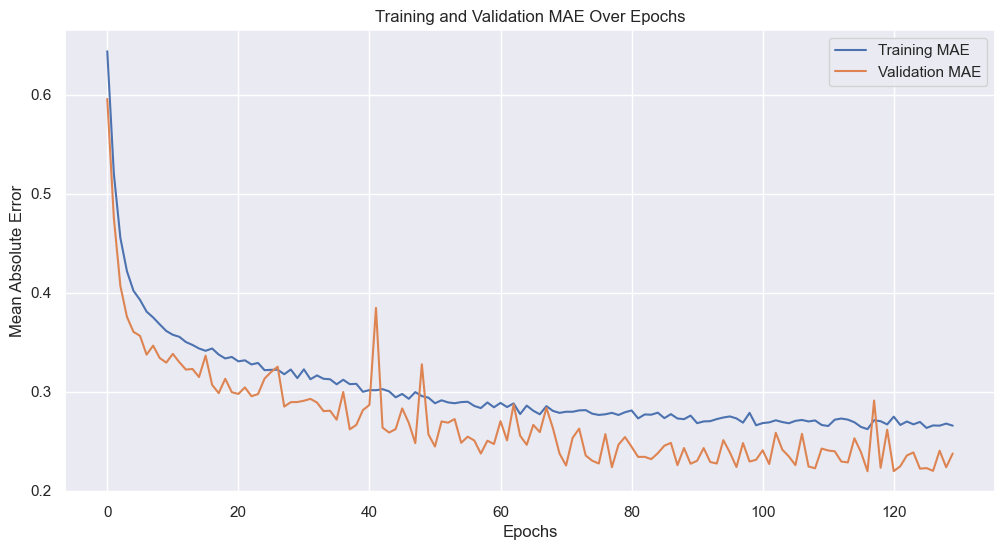

In [123]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Plot training and validation MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Training and Validation MAE Over Epochs")
plt.show()

In [124]:
def modelcheck(train, test):
    print(round(train))
    print(round(test))
    if round(train) > round(test):
        print("Model is overfit")
    elif round(train) == round(test):
        print("Model is best fit")
    elif round(train) < round(test):
        print("Model is underfit")

In [125]:
modelcheck(r2_score(y_train,model.predict(X_train))*100  ,  r2_score(y_test,model.predict(X_test))*100)

39/39 [==============================] - 0s 3ms/step
81
81
Model is best fit


### Increasing No. of Epoches & Batch Size

In [138]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, num_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Linear activation for regression output
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.2)

Epoch 1/300
139/139 [==============================] - 7s 16ms/step - loss: 0.8656 - mae: 0.6487 - val_loss: 0.7552 - val_mae: 0.5946
Epoch 2/300
139/139 [==============================] - 1s 7ms/step - loss: 0.6162 - mae: 0.5223 - val_loss: 0.5625 - val_mae: 0.4685
Epoch 3/300
139/139 [==============================] - 1s 7ms/step - loss: 0.4958 - mae: 0.4520 - val_loss: 0.4726 - val_mae: 0.4230
Epoch 4/300
139/139 [==============================] - 1s 7ms/step - loss: 0.4492 - mae: 0.4237 - val_loss: 0.4171 - val_mae: 0.3790
Epoch 5/300
139/139 [==============================] - 1s 7ms/step - loss: 0.4224 - mae: 0.4046 - val_loss: 0.4012 - val_mae: 0.3920
Epoch 6/300
139/139 [==============================] - 1s 7ms/step - loss: 0.3980 - mae: 0.3916 - val_loss: 0.3858 - val_mae: 0.3590
Epoch 7/300
139/139 [==============================] - 1s 10ms/step - loss: 0.3835 - mae: 0.3782 - val_loss: 0.3656 - val_mae: 0.3606
Epoch 8/300
139/139 [==============================] - 1s 9ms/step 

139/139 [==============================] - 1s 9ms/step - loss: 0.2049 - mae: 0.2631 - val_loss: 0.1937 - val_mae: 0.2429
Epoch 124/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2247 - mae: 0.2741 - val_loss: 0.1937 - val_mae: 0.2438
Epoch 125/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2136 - mae: 0.2666 - val_loss: 0.1957 - val_mae: 0.2338
Epoch 126/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2196 - mae: 0.2676 - val_loss: 0.1889 - val_mae: 0.2488
Epoch 127/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2085 - mae: 0.2647 - val_loss: 0.2254 - val_mae: 0.2401
Epoch 128/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2073 - mae: 0.2652 - val_loss: 0.2028 - val_mae: 0.2242
Epoch 129/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2092 - mae: 0.2667 - val_loss: 0.1865 - val_mae: 0.2324
Epoch 130/300
139/139 [==============================] - 1s 7ms/step 

Epoch 184/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2052 - mae: 0.2617 - val_loss: 0.1796 - val_mae: 0.2169
Epoch 185/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2151 - mae: 0.2695 - val_loss: 0.2050 - val_mae: 0.2620
Epoch 186/300
139/139 [==============================] - 1s 7ms/step - loss: 0.1968 - mae: 0.2583 - val_loss: 0.1817 - val_mae: 0.2397
Epoch 187/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2070 - mae: 0.2635 - val_loss: 0.1932 - val_mae: 0.2409
Epoch 188/300
139/139 [==============================] - 1s 7ms/step - loss: 0.1977 - mae: 0.2590 - val_loss: 0.1862 - val_mae: 0.2272
Epoch 189/300
139/139 [==============================] - 1s 7ms/step - loss: 0.1985 - mae: 0.2612 - val_loss: 0.1846 - val_mae: 0.2115
Epoch 190/300
139/139 [==============================] - 1s 7ms/step - loss: 0.2019 - mae: 0.2609 - val_loss: 0.1943 - val_mae: 0.2462
Epoch 191/300
139/139 [==============================] 

In [139]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

39/39 [==============================] - 0s 4ms/step - loss: 0.1443 - mae: 0.2125
Test Mean Absolute Error: 0.21248964965343475


### Loss Graph

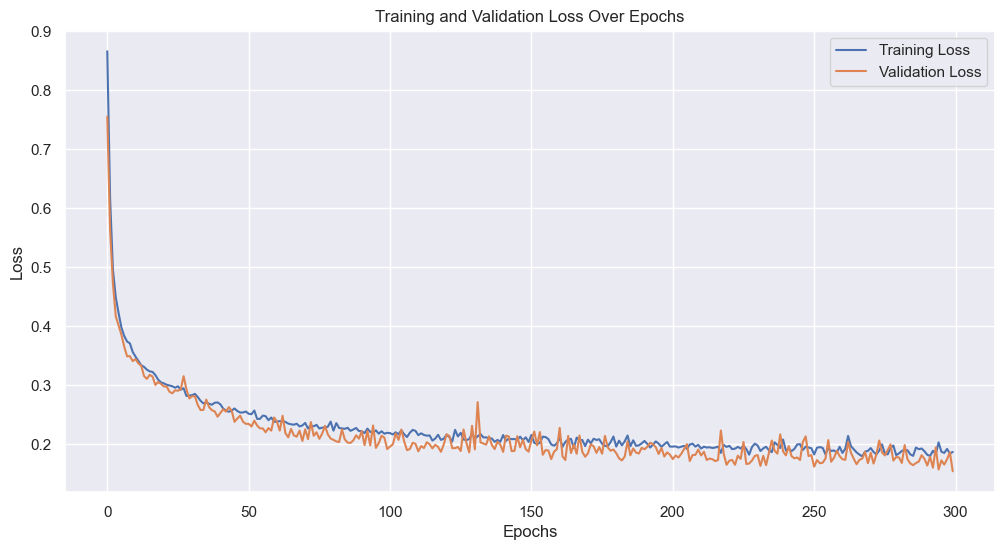

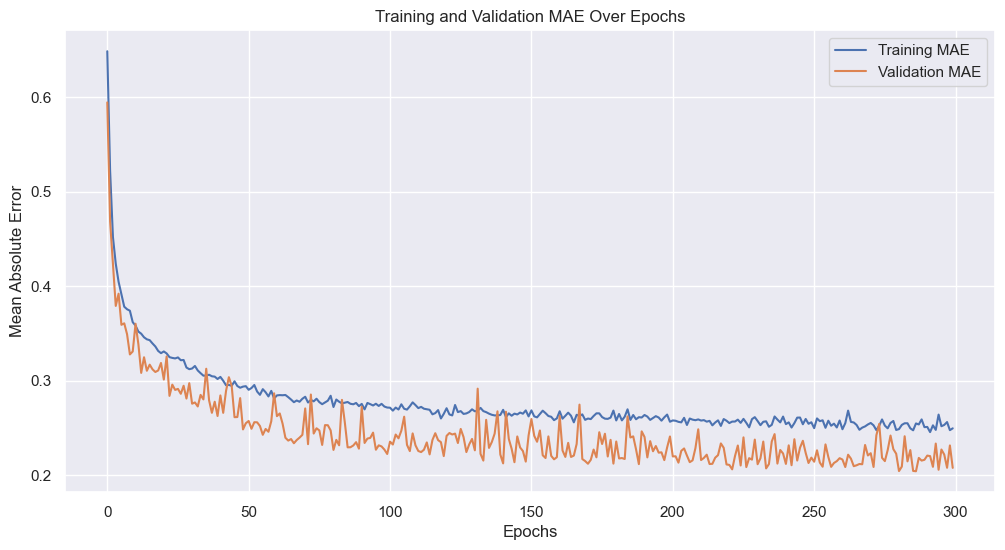

In [140]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Plot training and validation MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Training and Validation MAE Over Epochs")
plt.show()

In [141]:
modelcheck(r2_score(y_train,model.predict(X_train))*100  ,  r2_score(y_test,model.predict(X_test))*100)

39/39 [==============================] - 0s 4ms/step
86
85
Model is overfit


### Try to Increase No. of Epochs & Batch Size

In [130]:
timesteps = X_train.shape[1] 
num_features = X_train.shape[2]
# Define the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, num_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  # Linear activation for regression output

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=276, validation_split=0.2)




Epoch 1/500
33/33 [==============================] - 9s 54ms/step - loss: 0.9625 - mae: 0.6972 - val_loss: 0.9379 - val_mae: 0.6838
Epoch 2/500
33/33 [==============================] - 0s 11ms/step - loss: 0.8505 - mae: 0.6439 - val_loss: 0.8182 - val_mae: 0.6221
Epoch 3/500
33/33 [==============================] - 0s 13ms/step - loss: 0.7474 - mae: 0.5993 - val_loss: 0.7479 - val_mae: 0.5868
Epoch 4/500
33/33 [==============================] - 0s 11ms/step - loss: 0.6712 - mae: 0.5550 - val_loss: 0.6795 - val_mae: 0.5538
Epoch 5/500
33/33 [==============================] - 1s 16ms/step - loss: 0.6095 - mae: 0.5190 - val_loss: 0.6071 - val_mae: 0.4991
Epoch 6/500
33/33 [==============================] - 0s 12ms/step - loss: 0.5562 - mae: 0.4843 - val_loss: 0.5574 - val_mae: 0.4559
Epoch 7/500
33/33 [==============================] - 0s 11ms/step - loss: 0.5175 - mae: 0.4618 - val_loss: 0.5067 - val_mae: 0.4539
Epoch 8/500
33/33 [==============================] - 0s 12ms/step - loss: 0.

33/33 [==============================] - 0s 11ms/step - loss: 0.2362 - mae: 0.2832 - val_loss: 0.2265 - val_mae: 0.2554
Epoch 124/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2278 - mae: 0.2767 - val_loss: 0.2270 - val_mae: 0.2767
Epoch 125/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2435 - mae: 0.2861 - val_loss: 0.2216 - val_mae: 0.2519
Epoch 126/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2336 - mae: 0.2798 - val_loss: 0.2210 - val_mae: 0.2562
Epoch 127/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2305 - mae: 0.2728 - val_loss: 0.2309 - val_mae: 0.2788
Epoch 128/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2273 - mae: 0.2750 - val_loss: 0.2253 - val_mae: 0.2506
Epoch 129/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2314 - mae: 0.2794 - val_loss: 0.2183 - val_mae: 0.2376
Epoch 130/500
33/33 [==============================] - 0s 11ms/step - loss: 

33/33 [==============================] - 0s 11ms/step - loss: 0.1986 - mae: 0.2564 - val_loss: 0.1895 - val_mae: 0.2119
Epoch 246/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2003 - mae: 0.2591 - val_loss: 0.1847 - val_mae: 0.2086
Epoch 247/500
33/33 [==============================] - 0s 11ms/step - loss: 0.1987 - mae: 0.2565 - val_loss: 0.1731 - val_mae: 0.2160
Epoch 248/500
33/33 [==============================] - 0s 12ms/step - loss: 0.1916 - mae: 0.2520 - val_loss: 0.1759 - val_mae: 0.2077
Epoch 249/500
33/33 [==============================] - 0s 11ms/step - loss: 0.1932 - mae: 0.2516 - val_loss: 0.1760 - val_mae: 0.2203
Epoch 250/500
33/33 [==============================] - 0s 11ms/step - loss: 0.1915 - mae: 0.2521 - val_loss: 0.1818 - val_mae: 0.2222
Epoch 251/500
33/33 [==============================] - 0s 11ms/step - loss: 0.2054 - mae: 0.2613 - val_loss: 0.1850 - val_mae: 0.2109
Epoch 252/500
33/33 [==============================] - 0s 10ms/step - loss: 

33/33 [==============================] - 0s 10ms/step - loss: 0.1843 - mae: 0.2456 - val_loss: 0.1762 - val_mae: 0.2037
Epoch 368/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1770 - mae: 0.2422 - val_loss: 0.1535 - val_mae: 0.2029
Epoch 369/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1775 - mae: 0.2434 - val_loss: 0.1721 - val_mae: 0.2076
Epoch 370/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1817 - mae: 0.2454 - val_loss: 0.1667 - val_mae: 0.2174
Epoch 371/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1855 - mae: 0.2494 - val_loss: 0.1703 - val_mae: 0.2050
Epoch 372/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1823 - mae: 0.2449 - val_loss: 0.1550 - val_mae: 0.2004
Epoch 373/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1732 - mae: 0.2396 - val_loss: 0.1530 - val_mae: 0.1982
Epoch 374/500
33/33 [==============================] - 0s 10ms/step - loss: 

33/33 [==============================] - 0s 10ms/step - loss: 0.1703 - mae: 0.2334 - val_loss: 0.1559 - val_mae: 0.2081
Epoch 490/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1675 - mae: 0.2361 - val_loss: 0.2154 - val_mae: 0.2319
Epoch 491/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1789 - mae: 0.2447 - val_loss: 0.1540 - val_mae: 0.2058
Epoch 492/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1836 - mae: 0.2476 - val_loss: 0.1579 - val_mae: 0.1995
Epoch 493/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1704 - mae: 0.2381 - val_loss: 0.1727 - val_mae: 0.2234
Epoch 494/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1903 - mae: 0.2508 - val_loss: 0.1612 - val_mae: 0.2187
Epoch 495/500
33/33 [==============================] - 0s 10ms/step - loss: 0.1671 - mae: 0.2364 - val_loss: 0.1428 - val_mae: 0.1890
Epoch 496/500
33/33 [==============================] - 0s 11ms/step - loss: 

In [131]:
# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

39/39 [==============================] - 0s 4ms/step - loss: 0.1747 - mae: 0.2157
Test Mean Absolute Error: 0.2157301902770996


### Loss Graph

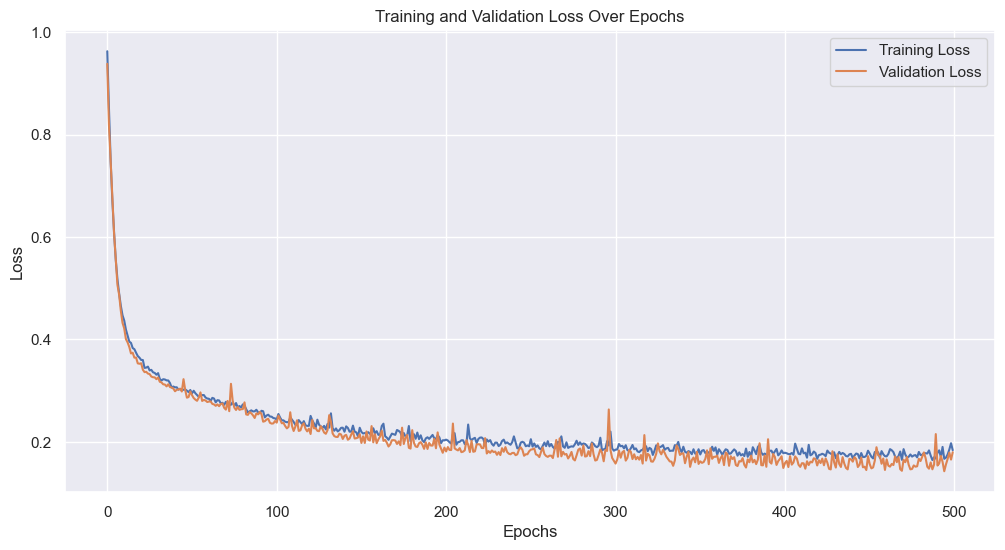

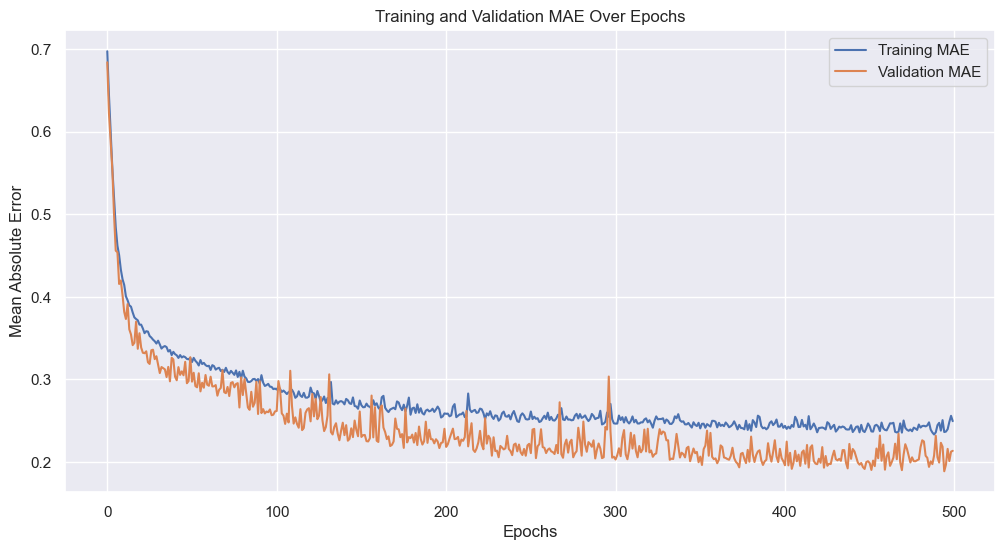

In [132]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Plot training and validation MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("Training and Validation MAE Over Epochs")
plt.show()

In [133]:
modelcheck(r2_score(y_train,model.predict(X_train))*100  ,  r2_score(y_test,model.predict(X_test))*100)

39/39 [==============================] - 0s 4ms/step
83
82
Model is overfit


## CNN Model

In [145]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Verify initial shape of X_train
print("Initial X_train shape:", X_train.shape)
print("Initial X_test shape:", X_test.shape)

# Define the CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn.add(MaxPooling1D(pool_size=1))
cnn.add(Dropout(0.2))

cnn.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
cnn.add(MaxPooling1D(pool_size=1))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1))  # Single neuron for regression output

# Compile the model
cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history1 = cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Initial X_train shape: (11105, 1, 9)
Initial X_test shape: (1234, 1, 9)

Epoch 1/50
278/278 [==============================] - 4s 7ms/step - loss: 0.8094 - mae: 0.6239 - val_loss: 0.6871 - val_mae: 0.5382
Epoch 2/50
278/278 [==============================] - 2s 6ms/step - loss: 0.6476 - mae: 0.5400 - val_loss: 0.5866 - val_mae: 0.4737
Epoch 3/50
278/278 [==============================] - 2s 6ms/step - loss: 0.5671 - mae: 0.4988 - val_loss: 0.4895 - val_mae: 0.4196
Epoch 4/50
278/278 [==============================] - 2s 6ms/step - loss: 0.5316 - mae: 0.4701 - val_loss: 0.4702 - val_mae: 0.4227
Epoch 5/50
278/278 [==============================] - 2s 7ms/step - loss: 0.4907 - mae: 0.4515 - val_loss: 0.4196 - val_mae: 0.3943
Epoch 6/50
278/278 [==============================] - 2s 6ms/step - loss: 0.4705 - mae: 0.4421 - val_loss: 0.4087 - val_mae: 0.4026
Epoch 7/50
278/278 [==============================] - 2s 7ms/step - loss: 0.4424 - mae: 0.4236 - val_loss: 0.3911 - val_mae: 0.4052
Epo

In [146]:
# Evaluate the model on test data
loss, mae = cnn.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

39/39 [==============================] - 0s 4ms/step - loss: 0.2052 - mae: 0.2547
Test Mean Absolute Error: 0.25470301508903503


### Loss Graph

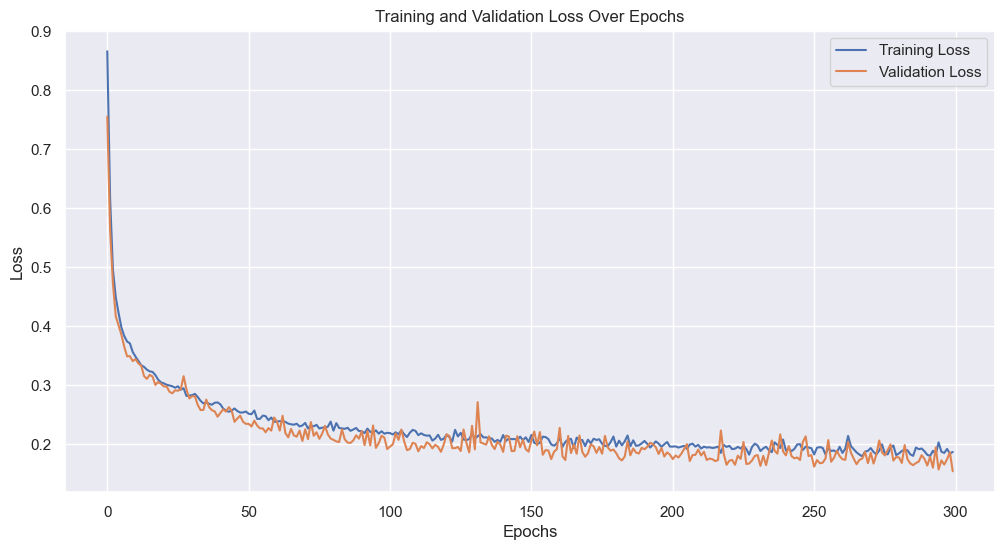

In [147]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

### Accuracy Check

In [148]:
modelcheck(r2_score(y_train,cnn.predict(X_train))*100  ,  r2_score(y_test,cnn.predict(X_test))*100)

39/39 [==============================] - 0s 4ms/step
79
78
Model is overfit


### Try to Tunne Model

In [149]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Verify initial shape of X_train
print("Initial X_train shape:", X_train.shape)
print("Initial X_test shape:", X_test.shape)

# Define the CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
cnn.add(MaxPooling1D(pool_size=1))
cnn.add(Dropout(0.2))

cnn.add(Conv1D(filters=32, kernel_size=1, activation='relu'))
cnn.add(MaxPooling1D(pool_size=1))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1))  # Single neuron for regression output

# Compile the model
cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history1 = cnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Initial X_train shape: (11105, 1, 9)
Initial X_test shape: (1234, 1, 9)
Epoch 1/100
278/278 [==============================] - 3s 7ms/step - loss: 0.8423 - mae: 0.6423 - val_loss: 0.7050 - val_mae: 0.5657
Epoch 2/100
278/278 [==============================] - 2s 7ms/step - loss: 0.6597 - mae: 0.5501 - val_loss: 0.5780 - val_mae: 0.4851
Epoch 3/100
278/278 [==============================] - 2s 8ms/step - loss: 0.6010 - mae: 0.5139 - val_loss: 0.5140 - val_mae: 0.4442
Epoch 4/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5421 - mae: 0.4829 - val_loss: 0.4693 - val_mae: 0.4242
Epoch 5/100
278/278 [==============================] - 2s 7ms/step - loss: 0.5182 - mae: 0.4680 - val_loss: 0.4372 - val_mae: 0.4111
Epoch 6/100
278/278 [==============================] - 2s 7ms/step - loss: 0.4780 - mae: 0.4463 - val_loss: 0.4590 - val_mae: 0.3963
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4647 - mae: 0.4355 - val_loss: 0.4168 - val_mae: 0.38

In [150]:
# Evaluate the model on test data
loss, mae = cnn.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error: {mae}")

39/39 [==============================] - 0s 4ms/step - loss: 0.2013 - mae: 0.2518
Test Mean Absolute Error: 0.25176823139190674


### Loss Graph

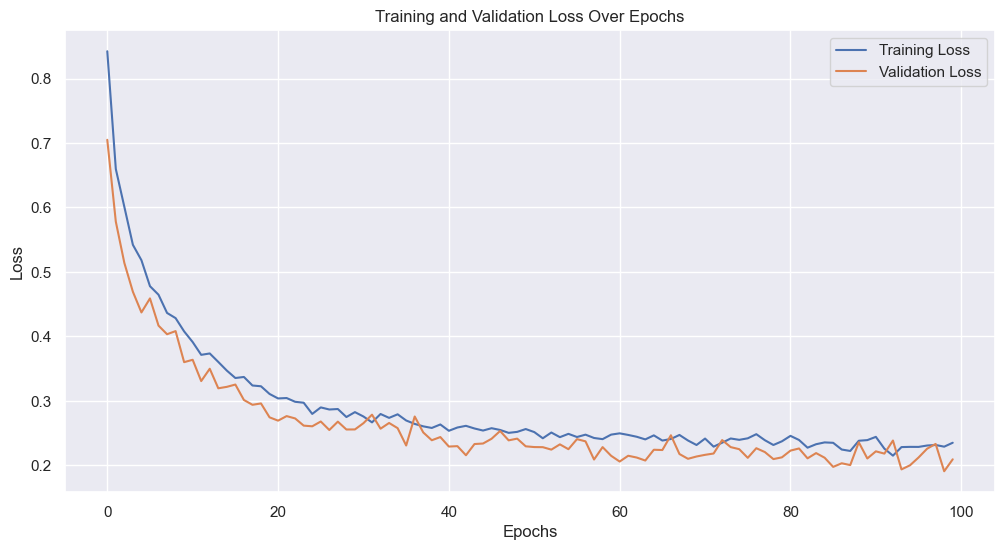

In [151]:
# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

### Model Accuracy 

In [152]:
modelcheck(r2_score(y_train,cnn.predict(X_train))*100  ,  r2_score(y_test,cnn.predict(X_test))*100)

39/39 [==============================] - 0s 4ms/step
81
79
Model is overfit


## Results and Analysis

### 1. Data Overview and Preprocessing:

- The dataset included variables like Crop, Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Pesticide, and Yield (target variable).

- No missing values were present. Outliers were detected and removed based on the interquartile range (IQR).

- Categorical features (such as Crop, Season, and State) were label-encoded, and all features were standardized for better model convergence.

### 2. Feature Engineering:

- Standard scaling was applied to numerical features for uniform scaling.
- Pair plots and correlation heatmaps provided insights into feature relationships and their impact on yield.

### 3. Model Selection and Evaluation:

- Various models were tested, including Random Forest, Decision Tree, Gradient Boosting, AdaBoost, KNeighborsRegressor, Linear Regression, CNN, ANN, and RNN.

### 4. Model Accuracies:

- Random Forest Regressor: After Optuna tuning, achieved 96% training accuracy and 93.1% test accuracy. This model performed the best, balancing high accuracy with effective generalization.
- Decision Tree Regressor: Showed 100% training accuracy but overfitted the data, leading to a test accuracy of 87.4%.
- Gradient Boosting Regressor: Achieved 88.9% training accuracy and 87.6% test accuracy, offering reasonable but slightly lower performance than Random Forest.
- AdaBoost Regressor: Scored 36.5% training accuracy and 35.9% test accuracy, indicating weak predictive power on this dataset.
- KNeighborsRegressor: Reached 69.6% training accuracy and 58.4% test accuracy, showing limited capability for yield prediction.
- Linear Regression: Showed 28.6% training accuracy and 30.4% test accuracy, performing relatively poorly.
- Convolutional Neural Network (CNN): The CNN achieved moderate results, with the MAE decreasing over epochs. However, it did not surpass the performance of tree-based models due to the structured, tabular nature of the data.
- Artificial Neural Network (ANN): Achieved an R² score of around 27% for both training and test sets. Tuning and adding layers did not significantly improve performance.
- Recurrent Neural Network (RNN): Achieved moderate accuracy with the mean absolute error gradually reducing over epochs, but it did not outperform Random Forest.

### 5. Hyperparameter Tuning:

- Optuna tuning improved Random Forest’s performance, yielding 96% training accuracy and 93.1% test accuracy.

### 6. Conclusion:

- Top Performer: The Random Forest Regressor emerged as the best model after tuning, with 96% training accuracy and 93.1% test accuracy.
- Comparison: While neural network models (CNN, ANN, RNN) showed potential, they did not outperform Random Forest. Ensemble and tree-based methods are better suited for this dataset.
- Importance of Feature Engineering: Outlier removal and scaling enhanced model performance, as did proper encoding of categorical variables.
- Future Enhancements: Further optimization of deep learning models or using time-series data could potentially improve accuracy.

### 7. Summary:

**The project shows that machine learning models, especially ensemble methods like Random Forest, can effectively predict crop yield using historical data, aiding farmers in data driven decision making**.